In [20]:
import pandas as pd
import seaborn as sns

In [21]:
df = pd.read_csv('../data/sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv')
df.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation
0,2015-01-24T21:45:00+11:00,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253"
1,2015-01-24T22:15:00+11:00,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888"
2,2015-01-24T22:15:00+11:00,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851"
3,2015-01-24T22:55:00+11:00,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851"
4,2015-01-24T22:55:00+11:00,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253"


In [22]:
df.shape

(56570, 21)

In [23]:
df.isna().sum()

timestamp           0
mac                 0
boardtype           0
boardid             0
temp_max            0
temp_min            0
temp_avg            0
light_max           0
light_min           0
light_avg           0
humidity_min        0
humidity_max        0
humidity_avg        0
model               0
latitude            0
longitude           0
elevation       21595
location            0
rowid               0
Position        56570
geolocation         0
dtype: int64

In [24]:
df = df.drop(columns=['Position'])

<Axes: ylabel='Frequency'>

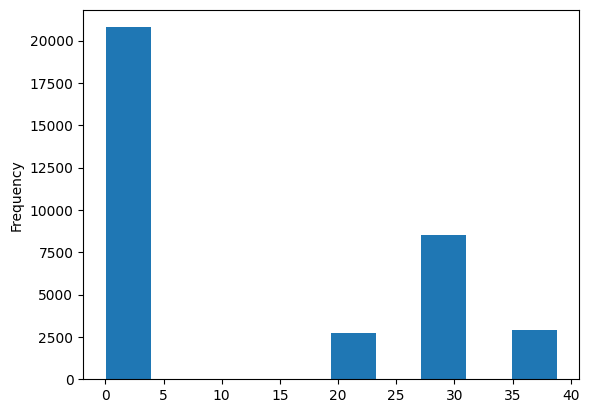

In [25]:
df['elevation'].plot(kind='hist')

In [26]:
df['elevation'].bfill().iloc[df.isnull().index].unique()

array([2.257e+01, 2.996e+01, 3.010e+01, 2.991e+01, 3.879e+01, 3.750e+00,
       3.000e-02, 7.100e-01, 2.740e+00])

In [27]:
df['elevation'] = df['elevation'].bfill()

In [28]:
df.isna().sum()

timestamp       0
mac             0
boardtype       0
boardid         0
temp_max        0
temp_min        0
temp_avg        0
light_max       0
light_min       0
light_avg       0
humidity_min    0
humidity_max    0
humidity_avg    0
model           0
latitude        0
longitude       0
elevation       0
location        0
rowid           0
geolocation     0
dtype: int64

For filling missing entries, I use the backward fill (bfill) method because it is suitable for time-series data, ensuring that missing values are filled with the next available value. This method maintains the continuity of the data, which is important for sensor readings. While I drop the column because it contains no information

In [29]:
# Apply one-hot encoding to the 'location' column
data_encoded = pd.get_dummies(df, columns=['location'], prefix='location')

# Display the encoded columns
encoded_columns = data_encoded.filter(like='location_').columns
encoded_columns


Index(['location_Docklands Library', 'location_Fitzroy Gardens'], dtype='object')

For encoding the location column, I will use one-hot encoding. This approach is suitable as location is a nominal categorical variable, and one-hot encoding will convert it into a binary matrix, preserving the categorical nature without implying any ordinal relationship.

In [32]:
data_encoded.to_csv('encoded_columns.csv', index=False, columns=encoded_columns)

In [35]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


features_to_scale = ['boardtype', 'boardid', 'temp_max', 'temp_min', 'temp_avg', 
                     'light_max', 'light_min', 'light_avg', 
                     'humidity_min', 'humidity_max', 'humidity_avg']

scaler = MinMaxScaler()
data_scaled = data_encoded.copy()
data_scaled[features_to_scale] = scaler.fit_transform(data_scaled[features_to_scale])


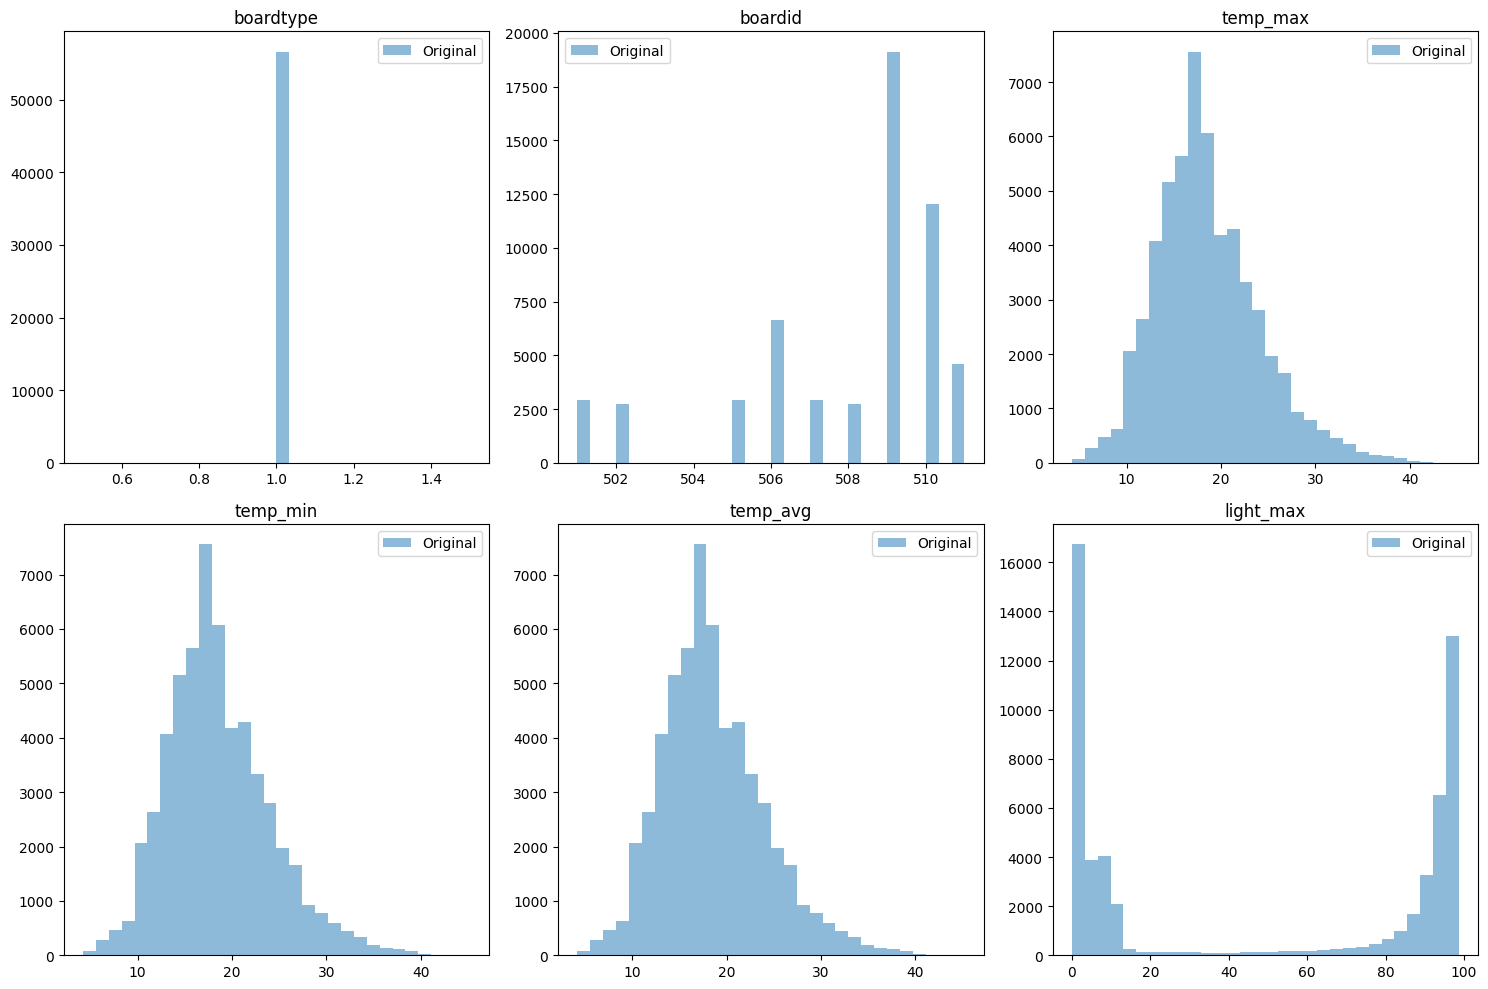

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(features_to_scale[:6]):
    ax = axes[i//3, i%3]
    ax.hist(data_encoded[feature].dropna(), bins=30, alpha=0.5, label='Original')
    ax.set_title(feature)
    ax.legend()

plt.tight_layout()
plt.show()

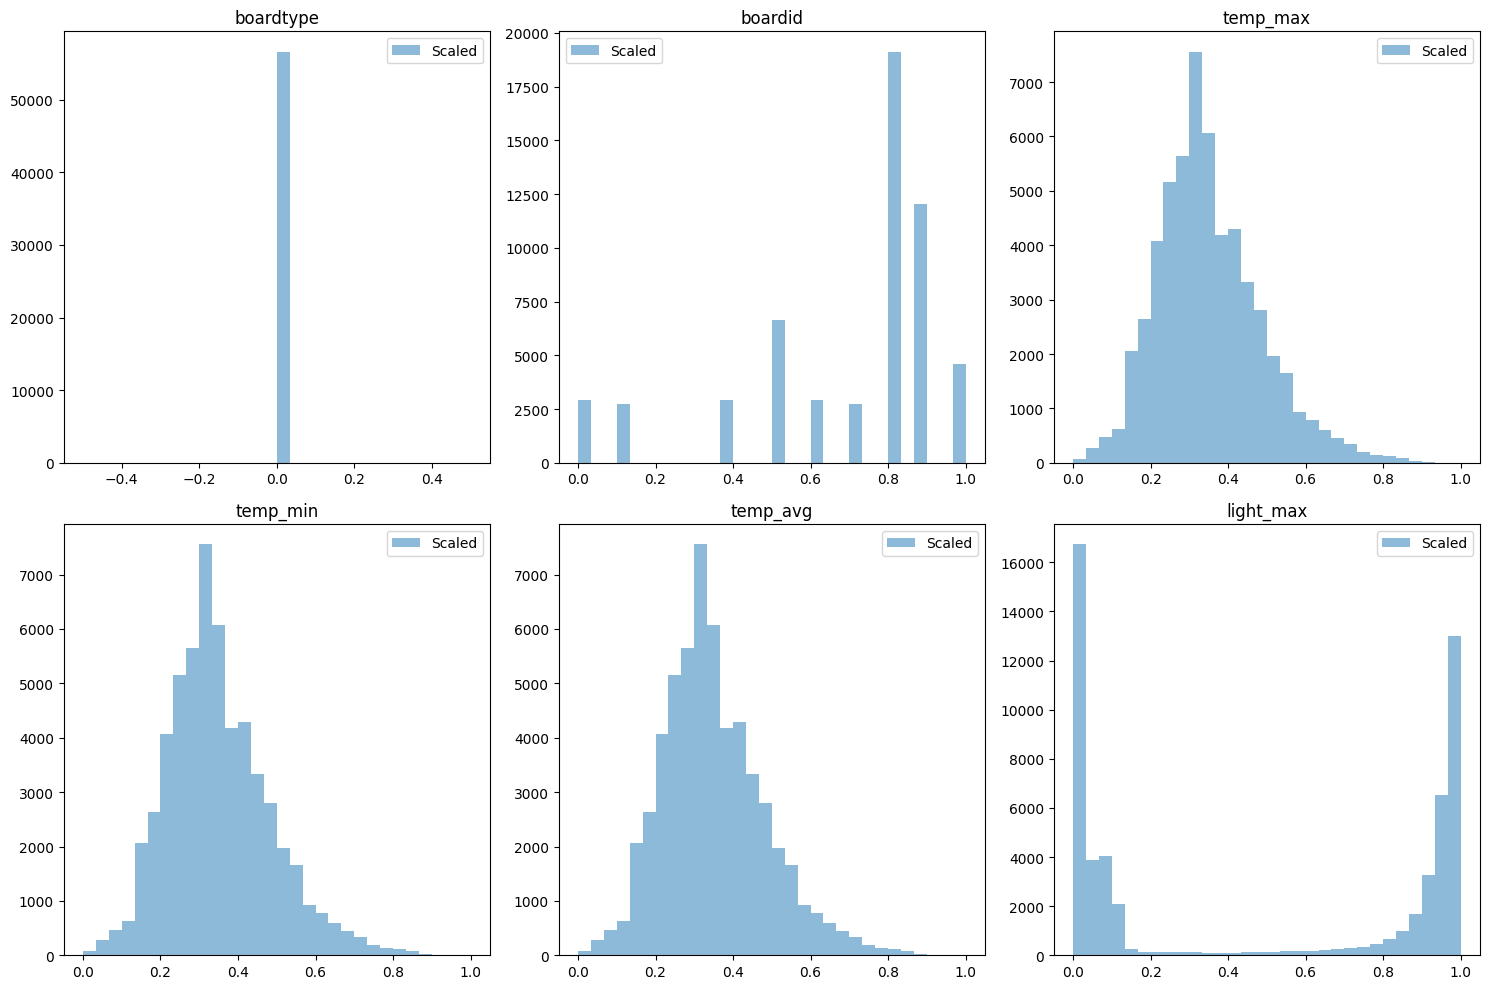

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(features_to_scale[:6]):
    ax = axes[i//3, i%3]
    ax.hist(data_scaled[feature].dropna(), bins=30, alpha=0.5, label='Scaled')
    ax.set_title(feature)
    ax.legend()

plt.tight_layout()
plt.show()

The histograms above show the distribution of the first six features before and after scaling. Here's a summary of the differences:

- Range Adjustment: The scaled features are compressed into the range [0, 1], whereas the original features had their own distinct ranges.
- Shape Preservation: The overall shape of the distributions remains the same; only the scale changes. This is a key property of min-max scaling.